In [1]:
import perceptron as michael
import random
import time
import os
import math
import numpy as np
import re
import sys
import pandas as pd
import datetime
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import tensorflow as tf
import keras
from keras import models, layers, losses, metrics, optimizers
from keras.callbacks import TensorBoard
# %load_ext tensorboard

Using TensorFlow backend.


In [2]:
import seaborn as sns
sns.set
sns.set_style("darkgrid")

# (1)

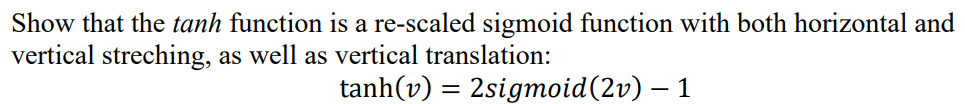

# (2)

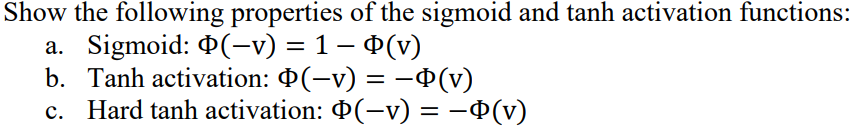

## a)

## b)

## c)

# (3)

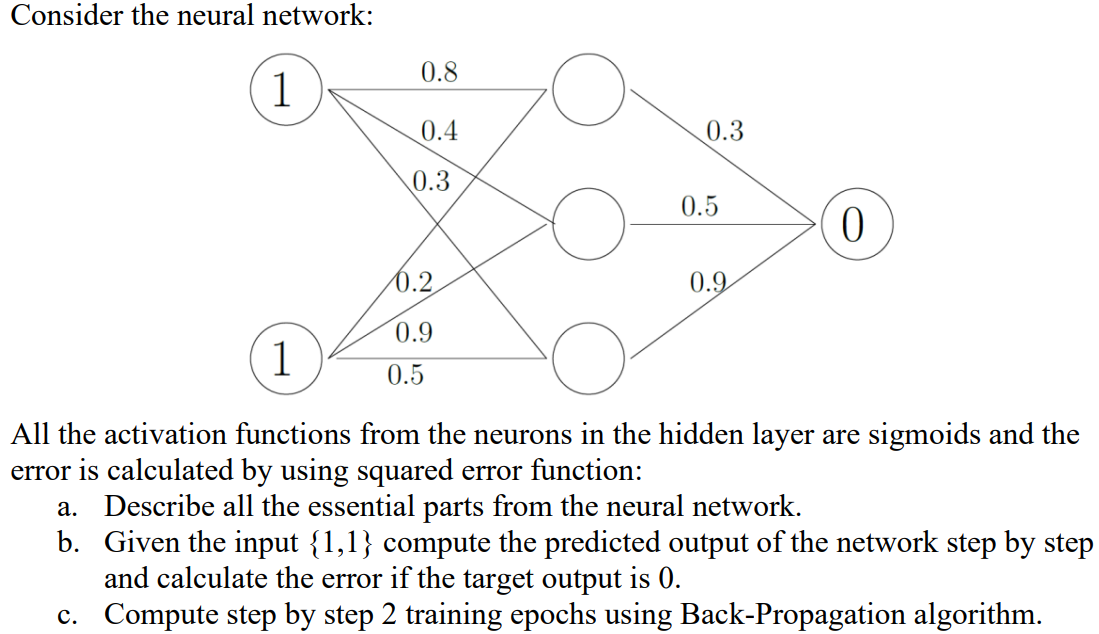

## a) The network has three layers where the first is the input layer, the second is a hidden layer with sigmoid as the activation function, and the last is the output layer (presumably also with sigmoid activation). Each layer is dense or fully connected. There is no bias added to any of the layers or nodes. This is a very simple network. This is a small MLP. There is no momentum or learning rate specified.

## b) computing output & error
- need to calculate the activation of the sum of the (weights * inputs) for each node(neuron)

In [3]:
inputNode1, inputNode2, targetNode = 1, 1, 0
inputWeights1 = [0.8, 0.4, 0.3]
inputWeights2 = [0.2, 0.9, 0.5]
hiddenWeights = [0.3, 0.5, 0.9]

#### Predicted Hidden Node 1 & error

In [4]:
p_hiddenNode1 = michael.sigmoid((inputNode1 * inputWeights1[0]) 
                                + (inputNode2 * inputWeights2[0]))
h1Error = michael.MSE(hiddenWeights[0], p_hiddenNode1, 2)
p_hiddenNode1, h1Error

(0.7310585786300049, 0.09290574910526006)

##### change in weights

In [5]:
delta_h1Weight1, delta_h1Weight2 = h1Error * inputNode1, h1Error * inputNode2
delta_h1Weight1, delta_h1Weight2

(0.09290574910526006, 0.09290574910526006)

#### Predicted Hidden Node 2 & error

In [6]:
p_hiddenNode2 = michael.sigmoid((inputNode1 * inputWeights1[1]) 
                                + (inputNode2 * inputWeights2[1]))
h2Error = michael.MSE(hiddenWeights[1], p_hiddenNode2, 2)
p_hiddenNode2, h2Error

(0.7858349830425586, 0.040850818765469886)

##### change in weights

In [7]:
delta_h2Weight1, delta_h2Weight2 = h2Error * inputNode1, h2Error * inputNode2
delta_h2Weight1, delta_h2Weight2

(0.040850818765469886, 0.040850818765469886)

#### Predicted Hidden Node 3 & error

In [8]:
p_hiddenNode3 = michael.sigmoid((inputNode1 * inputWeights1[2]) 
                              + (inputNode2 * inputWeights1[2]))
h3Error = michael.MSE(hiddenWeights[2], p_hiddenNode3, 2)
p_hiddenNode3, h3Error

(0.6456563062257954, 0.03234535728135319)

##### change in weights

In [9]:
delta_h3Weight1, delta_h3Weight2 = h3Error * inputNode1, h3Error * inputNode2
delta_h3Weight1, delta_h3Weight2

(0.03234535728135319, 0.03234535728135319)

### Predicted Output and Error

In [10]:
p_output = michael.sigmoid((p_hiddenNode1 * hiddenWeights[0]) 
                           + (p_hiddenNode2 * hiddenWeights[1]) 
                           + (p_hiddenNode3 * hiddenWeights[2]))
outputError = michael.MSE(targetNode, p_output, 2)

## c) computing 2 epochs
- already computed the predicted hidden nodes, the predicted output, and each of the corresponding errors for the first iteration
    - compute the back propagtion then compute another forward pass followed by another back prop
    - at the end of the second back prop the second epoch is over

#### arbitrary learning rate

In [11]:
learningRate = 0.01

In [12]:
### just for reference
# inputNode1, inputNode2, targetNode = 1, 1, 0
# inputWeights1 = [0.8, 0.4, 0.3]
# inputWeights2 = [0.2, 0.9, 0.5]
# hiddenWeights = [0.3, 0.5, 0.9]

### ** Epoch 1 **

#### from above - feed forward (forward propagation) to hidden layer

In [13]:
p_hiddenNodes = [p_hiddenNode1, p_hiddenNode2, p_hiddenNode3]
hiddenError = [h2Error, h2Error, h3Error]

#### feed forward to output layer

In [14]:
p_output = michael.sigmoid((p_hiddenNode1 * hiddenWeights[0]) 
                           + (p_hiddenNode2 * hiddenWeights[1]) 
                           + (p_hiddenNode3 * hiddenWeights[2]))
outputError = michael.MSE(targetNode, p_output)

### Back propagating

In [15]:
prop1 = learningRate * michael.dSigmoid(p_output) * p_hiddenNode1
prop2 = learningRate * michael.dSigmoid(p_output) * p_hiddenNode2
prop3 = learningRate * michael.dSigmoid(p_output) * p_hiddenNode3
[prop1, prop2, prop3]

[0.0015829715373775906, 0.0017015796648787403, 0.001398048782354902]

In [16]:
1#x = 3.0999999999999996

1

In [17]:
# hiddenWeights[0] = ##prop
# hiddenWeights[1] = ##prop
# hiddenWeights[2] = ##prop


# inputWeights1[0] = ##prop
# inputWeights2[0] = ##prop

# inputWeights1[1] = ##prop
# inputWeights2[1] = ##prop

# inputWeights1[2] = ##prop
# inputWeights2[2] = ##prop

### ** Epoch 2 **

#### forward propagate

In [18]:
### hidden node 1
p_hiddenNode1 = michael.sigmoid((inputNode1 * inputWeights1[0]) 
                                + (inputNode2 * inputWeights2[0]))
h1Error = michael.MSE(hiddenWeights[0], p_hiddenNode1, 2)

### hidden node 2
p_hiddenNode2 = michael.sigmoid((inputNode1 * inputWeights1[1]) 
                                + (inputNode2 * inputWeights2[1]))
h2Error = michael.MSE(hiddenWeights[1], p_hiddenNode2, 2)
p_hiddenNode2, h2Error

### hidden node 3
p_hiddenNode3 = michael.sigmoid((inputNode1 * inputWeights1[2]) 
                              + (inputNode2 * inputWeights1[2]))
h3Error = michael.MSE(hiddenWeights[2], p_hiddenNode3, 2)
p_hiddenNode3, h3Error


### predicted output
p_output = michael.sigmoid((p_hiddenNode1 * hiddenWeights[0]) 
                           + (p_hiddenNode2 * hiddenWeights[1]) 
                           + (p_hiddenNode3 * hiddenWeights[2]))
outputError = michael.MSE(targetNode, p_output, 2)

### Back propagating

In [19]:
prop1 = learningRate * michael.dSigmoid(p_output) * p_hiddenNode1
prop2 = learningRate * michael.dSigmoid(p_output) * p_hiddenNode2
prop3 = learningRate * michael.dSigmoid(p_output) * p_hiddenNode3
[prop1, prop2, prop3]

[0.0015829715373775906, 0.0017015796648787403, 0.001398048782354902]

# (4)

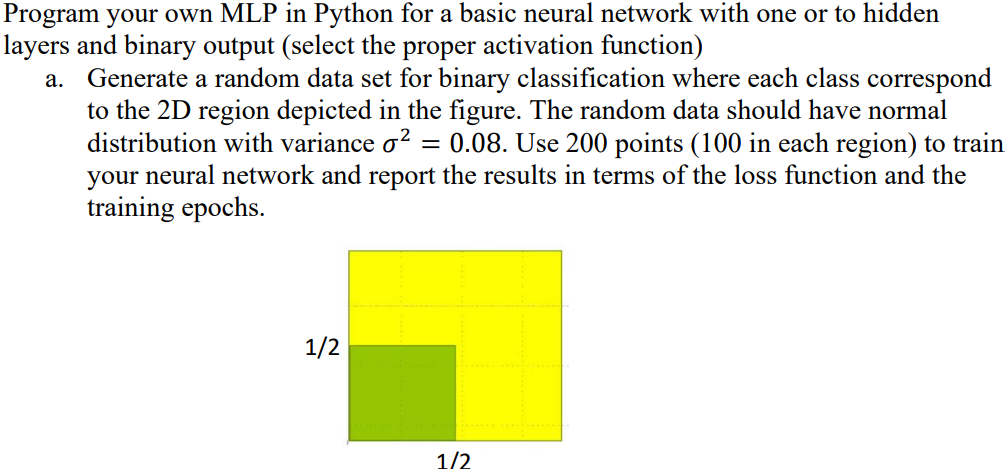

## a) Generating random data set with variance 0.08

In [20]:
binary_dataset = []
variance = 0.08
std = round(math.sqrt(variance), 3)

### this is the dataset for the green in 4.a

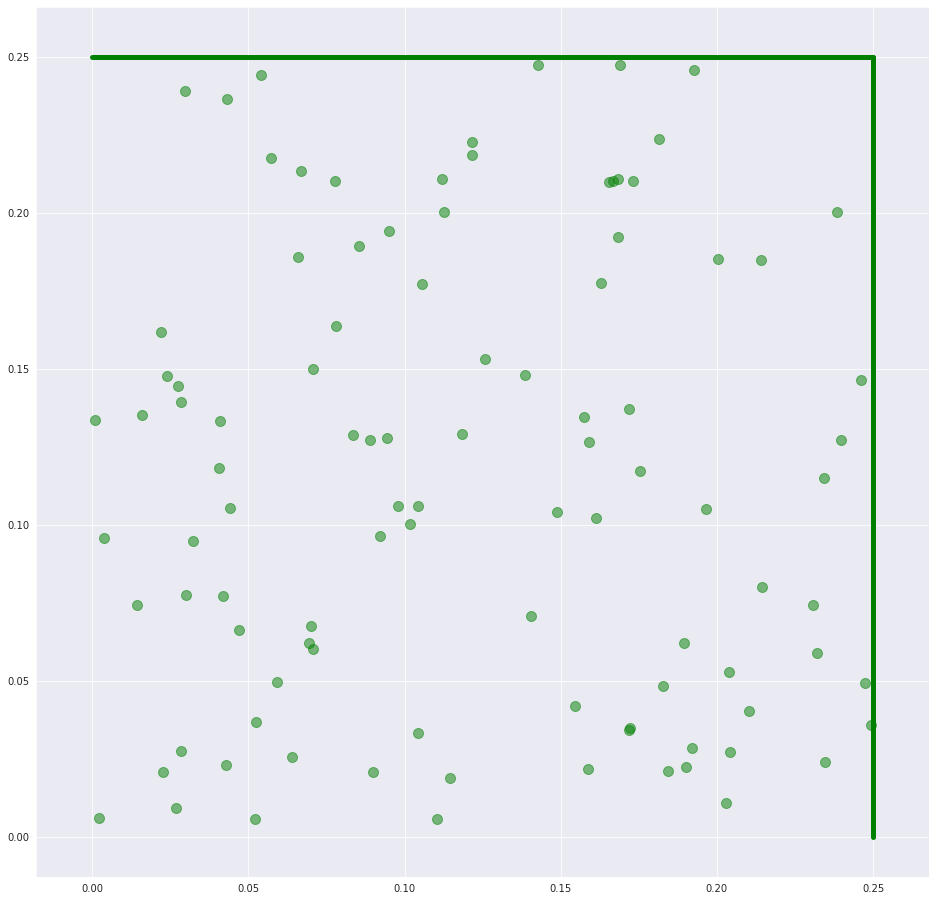

In [21]:
x1 = abs(np.random.normal(0, std, 1000))
y1 = abs(np.random.normal(0, std, 1000))

x2, y2 = [], []
for i, v in enumerate(x1):
    if x1[i] <= 0.25 and y1[i] <= 0.25 and len(x2) < 100:
        x2.append(x1[i])
        y2.append(y1[i])
binary_dataset.append(x2)
binary_dataset.append(y2)

fig = plt.figure(figsize=(16,16))
plt.scatter(x2,y2, c='g', s=100, alpha=0.5)
plt.plot([0,0.25], [0.25, 0.25], 'g', lw=5)
plt.plot([0.25,0.25], [0, 0.25], 'g', lw=5)

### this is the dataset for the yellow in 4.a

In [22]:
## top left
x1 = abs(np.random.normal(0, std, 500))
y1 = abs(np.random.normal(0, std, 500)) + 0.25

x2, y2 = [], []
for i, v in enumerate(x1):
    if x1[i] < 0.25 and y1[i] <= 0.5 and len(x2) < 33:
        x2.append(x1[i])
        y2.append(y1[i])
binary_dataset[0].extend(x2)
binary_dataset[1].extend(y2)
# plt.scatter(x2,y2)

In [23]:
## top right
x1 = abs(np.random.normal(0, std, 500)) + 0.25
y1 = abs(np.random.normal(0, std, 500)) + 0.25

x2, y2 = [], []
for i, v in enumerate(x1):
    if (0.25 < x1[i] <= 0.5) and (0.25 < y1[i] <= 0.5) and len(x2) < 33:
        x2.append(x1[i])
        y2.append(y1[i])
binary_dataset[0].extend(x2)
binary_dataset[1].extend(y2)
# plt.scatter(x2,y2)

In [24]:
## bottom right (someone has to get an extra point)
x1 = abs(np.random.normal(0, std, 500)) + 0.25
y1 = abs(np.random.normal(0, std, 500)) 

x2, y2 = [], []
for i, v in enumerate(x1):
    if x1[i] <= 0.5 and y1[i] < 0.25 and len(x2) < 34:
        x2.append(x1[i])
        y2.append(y1[i])
binary_dataset[0].extend(x2)
binary_dataset[1].extend(y2)
# plt.scatter(x2,y2)

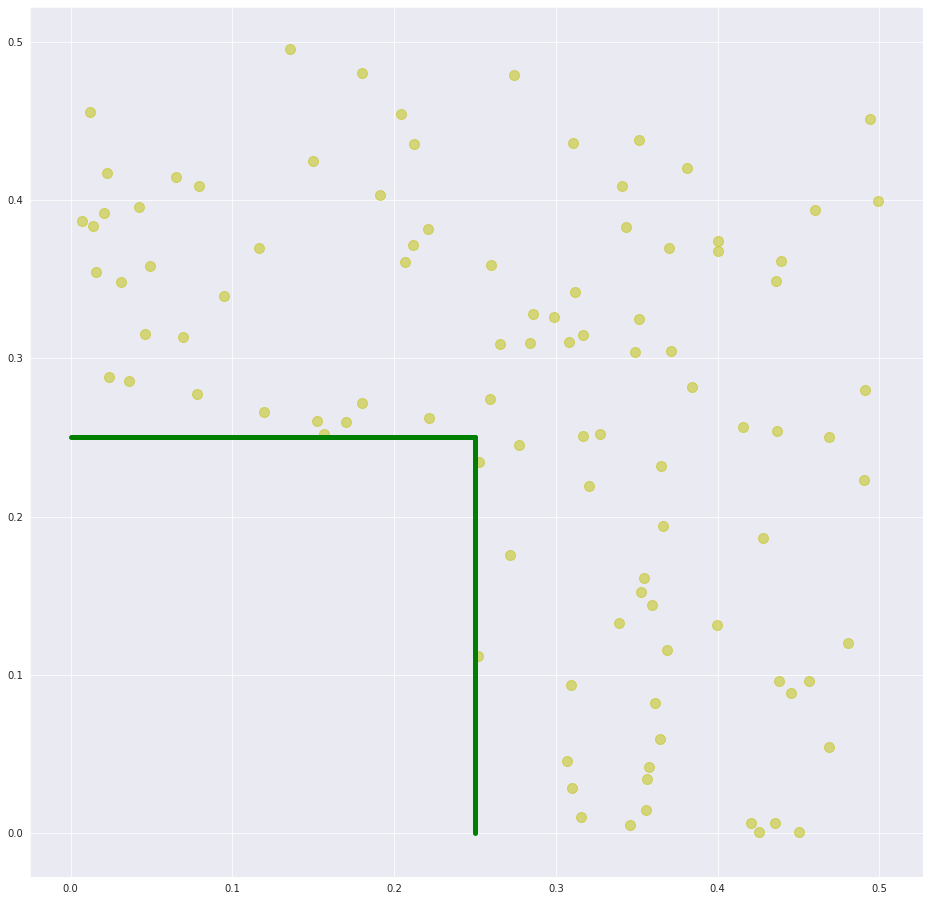

In [25]:
dataset = np.transpose(binary_dataset)

fig = plt.figure(figsize=(16,16))
for i, v in enumerate(dataset):
    if dataset[i][0] < 0.25 and dataset[i][1] < 0.25:
        pass
#         plt.scatter(dataset[i][0], dataset[i][1], c='g', s=100, alpha=0.5)
    else:
        plt.scatter(dataset[i][0], dataset[i][1], c='y', s=100, alpha=0.5)
plt.plot([0,0.25], [0.25, 0.25], 'g', lw=5)
plt.plot([0.25,0.25], [0, 0.25], 'g', lw=5)

In [26]:
df = pd.DataFrame(dataset)
## shuffle a few times
df = df.sample(frac=1).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)
dataset = df.to_numpy()
df

0         1
0    0.265154  0.308813
1    0.158673  0.021818
2    0.041075  0.133494
3    0.249409  0.036050
4    0.077786  0.210298
..        ...       ...
195  0.456750  0.095769
196  0.221447  0.262152
197  0.214520  0.080120
198  0.138441  0.148183
199  0.028348  0.139347

[200 rows x 2 columns]

### generate labels

In [27]:
labels = []
ones = []
zeros = []
for i in range(len(dataset)):
    x0, y0 = dataset[i]
    if (x0 <= 0.25) and (y0 <= 0.25):
        labels.append(1)
        ones.append(i)
    else:
        labels.append(0)
        zeros.append(i)

### validate labels

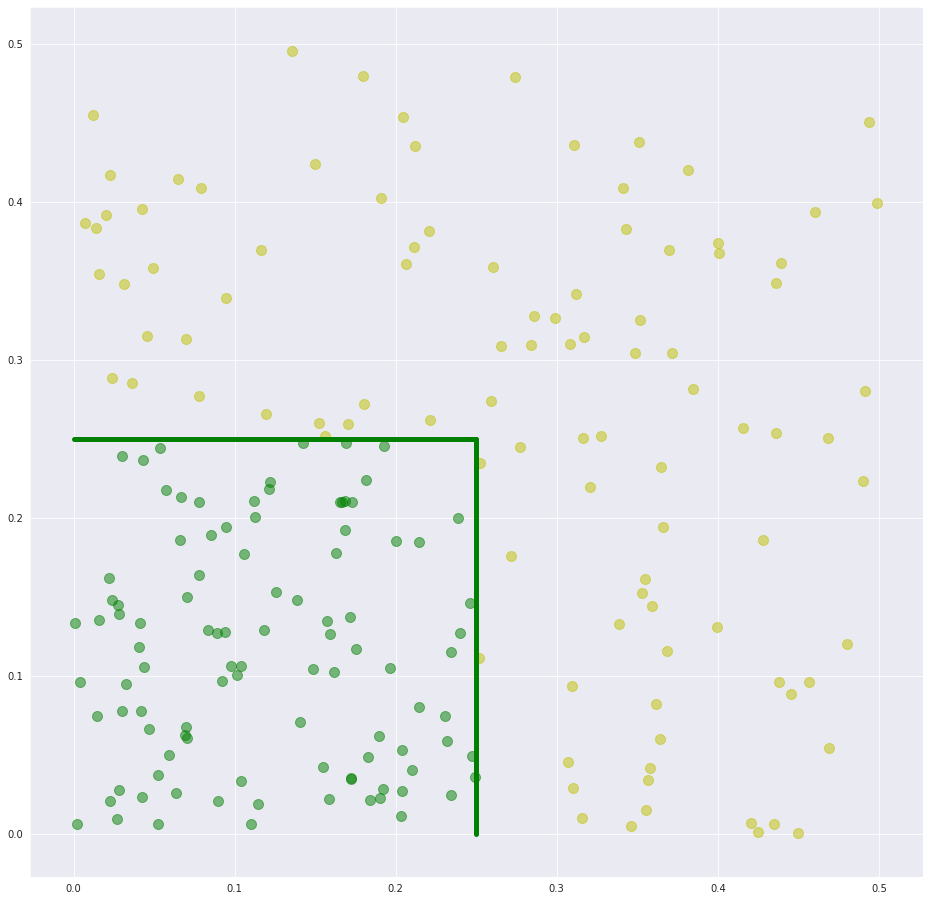

In [28]:
fig = plt.figure(figsize=(16,16))
for i,v in enumerate(labels):
    if labels[i] == 1:
        plt.scatter(dataset[i][0], dataset[i][1], c='g', s=100, alpha=0.5)
    else:
        plt.scatter(dataset[i][0], dataset[i][1], c='y', s=100, alpha=0.5)
plt.plot([0,0.25], [0.25, 0.25], 'g', lw=5)
plt.plot([0.25,0.25], [0, 0.25], 'g', lw=5)

In [29]:
x_train = dataset[:160]
y_train = labels[:160]

x_val = dataset[-40:]
y_val = labels[-40:]

In [30]:
(x_train.shape, len(y_train)), (x_val.shape, len(y_val))

(((160, 2), 160), ((40, 2), 40))

## For this problem I chose to use:
- 1 hidden layer
- relu as the activation for the input and hidden layers (because binary data: 0 or 1 as ouput) 
- sigmoid for activation in last layer (because sum of outputs does not to equal 1)
- rmsprop (because its good for SGD) 
- binary_crossentropy for loss (because data is binary)

## My model

In [31]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [32]:
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [33]:
### Tensorboard

In [34]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=2)

In [35]:
history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=16,
                    validation_data=(x_val, y_val))


Train on 160 samples, validate on 40 samples
Epoch 1/100
160/160 [==============================] - 0s 3ms/step - loss: 0.7063 - acc: 0.5250 - val_loss: 0.7083 - val_acc: 0.4000
Epoch 2/100
160/160 [==============================] - 0s 189us/step - loss: 0.7004 - acc: 0.5250 - val_loss: 0.7025 - val_acc: 0.4000
Epoch 3/100
160/160 [==============================] - 0s 174us/step - loss: 0.6960 - acc: 0.5250 - val_loss: 0.6968 - val_acc: 0.5000
Epoch 4/100
160/160 [==============================] - 0s 245us/step - loss: 0.6918 - acc: 0.6500 - val_loss: 0.6914 - val_acc: 0.6750
Epoch 5/100
160/160 [==============================] - 0s 254us/step - loss: 0.6876 - acc: 0.7625 - val_loss: 0.6864 - val_acc: 0.7000
Epoch 6/100
160/160 [==============================] - 0s 116us/step - loss: 0.6829 - acc: 0.8187 - val_loss: 0.6808 - val_acc: 0.7750
Epoch 7/100
160/160 [==============================] - 0s 180us/step - loss: 0.6781 - acc: 0.8375 - val_loss: 0.6746 - val_acc: 0.7750
Epoch 8/100

160/160 [==============================] - 0s 145us/step - loss: 0.3019 - acc: 0.9000 - val_loss: 0.3117 - val_acc: 0.8750
Epoch 60/100
160/160 [==============================] - 0s 208us/step - loss: 0.2990 - acc: 0.8938 - val_loss: 0.3082 - val_acc: 0.8750
Epoch 61/100
160/160 [==============================] - 0s 120us/step - loss: 0.2947 - acc: 0.9000 - val_loss: 0.3081 - val_acc: 0.8750
Epoch 62/100
160/160 [==============================] - 0s 116us/step - loss: 0.2911 - acc: 0.8875 - val_loss: 0.3064 - val_acc: 0.8750
Epoch 63/100
160/160 [==============================] - 0s 127us/step - loss: 0.2863 - acc: 0.8938 - val_loss: 0.3002 - val_acc: 0.8750
Epoch 64/100
160/160 [==============================] - 0s 131us/step - loss: 0.2836 - acc: 0.9000 - val_loss: 0.2980 - val_acc: 0.8750
Epoch 65/100
160/160 [==============================] - 0s 118us/step - loss: 0.2797 - acc: 0.8938 - val_loss: 0.2949 - val_acc: 0.8750
Epoch 66/100
160/160 [==============================] - 0s 11

## Evaluating the model

In [36]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

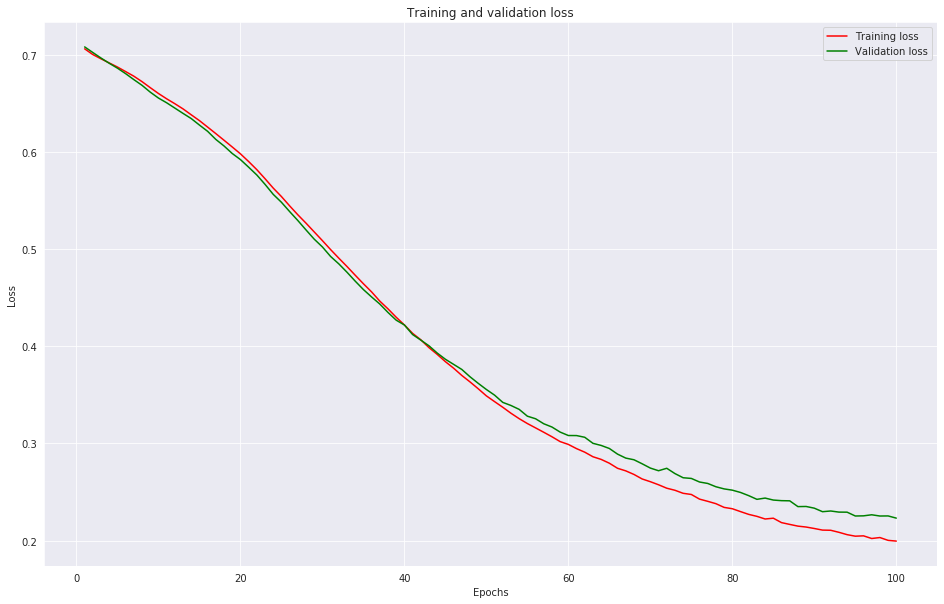

In [37]:
acc = history_dict['acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

# acc = history_dict['acc'][-100:]
# loss_values = history_dict['loss'][-100:]
# val_loss_values = history_dict['val_loss'][-100:]
# epochs = range(200, 300)

plt.figure(figsize=(16, 10))
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

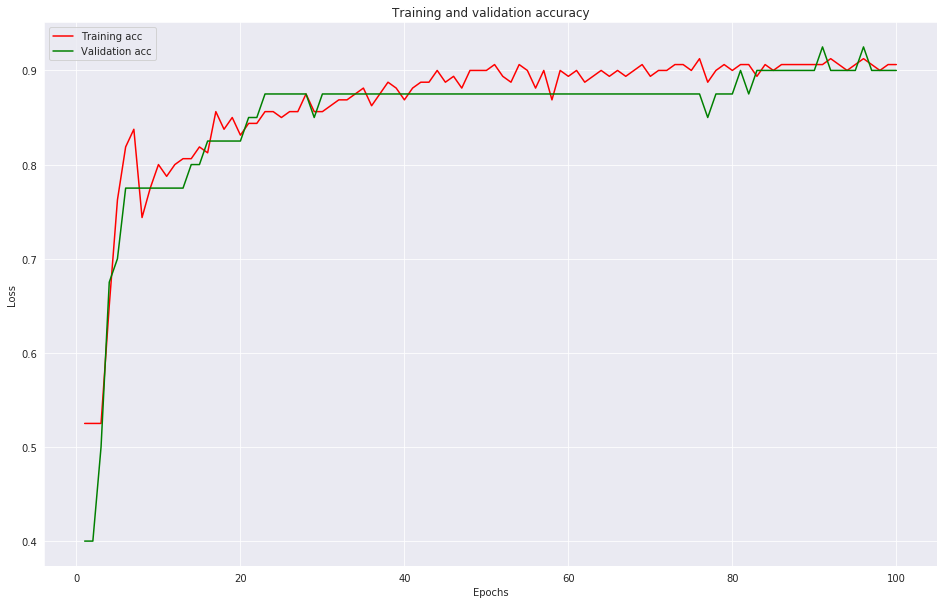

In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(16, 10))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Testing

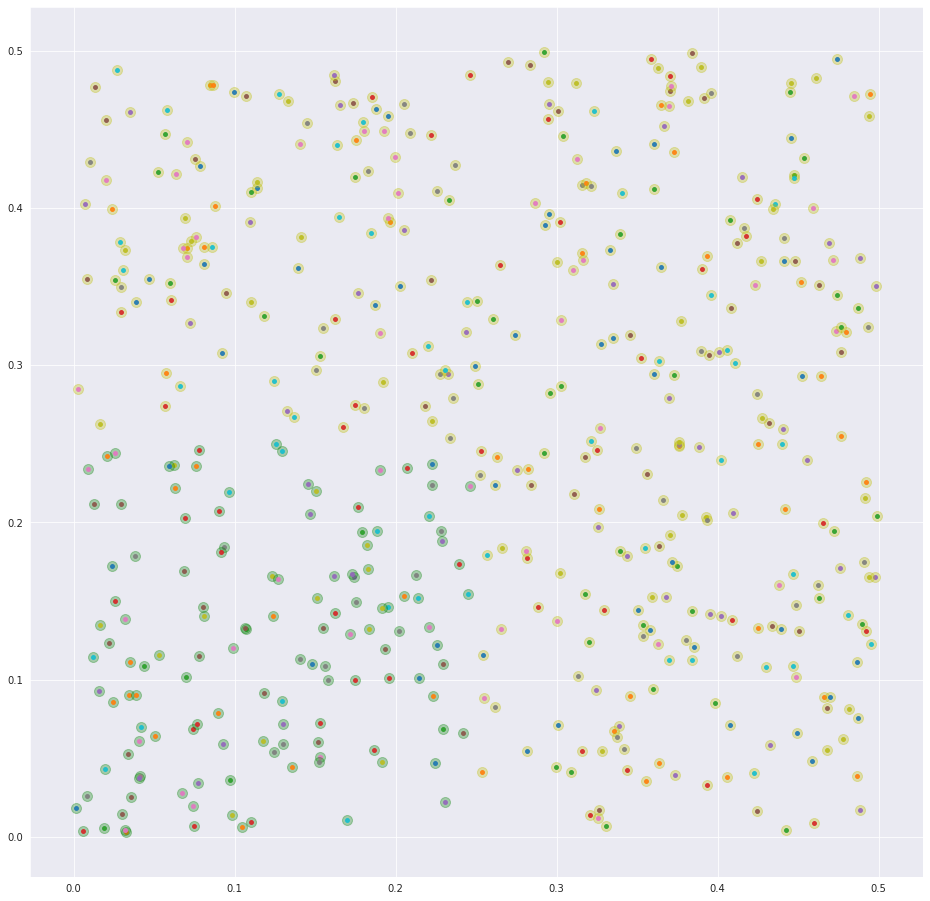

In [39]:
x_test, y_test = [], []
x1_test = abs(np.random.rand(5000))
y1_test = abs(np.random.rand(5000))

# x2_test, y2_test = x1_test, y1_test
x2_test, y2_test = [], []
for i, v in enumerate(x1_test):
    if x1_test[i] <= 0.5 and y1_test[i] <= 0.5 and len(x2_test) < 500:
        x2_test.append(x1_test[i])
        y2_test.append(y1_test[i])
x_test.append(x2_test)
x_test.append(y2_test)
x_test = np.transpose(x_test)

## dont need to shuffle because it is a random set of points

for i in range(len(x_test)):
    x0, y0 = x_test[i]
    if (x0 <= 0.25) and (y0 <= 0.25):
        y_test.append(1)
    else:
        y_test.append(0)
        
# plt.figure(figsize=(16,16))
# plt.scatter(x2_test, y2_test, s=100, alpha=0.5)


plt.figure(figsize=(16,16))
for i,v in enumerate(y_test):
    if y_test[i] == 1:
        plt.scatter(x_test[i][0], x_test[i][1], c='g', s=100, alpha=0.3)
        plt.scatter(x_test[i][0], x_test[i][1], s=15, alpha=0.9)
    else:
        plt.scatter(x_test[i][0], x_test[i][1], c='y', s=100, alpha=0.3)
        plt.scatter(x_test[i][0], x_test[i][1], s=15, alpha=0.9)        

In [40]:
results = model.evaluate(x_test, y_test)
results, model.metrics_names

500/500 [==============================] - 0s 49us/step


([0.16053409773111343, 0.9379999995231628], ['loss', 'acc'])

## b) Generating random data set with variance 0.08
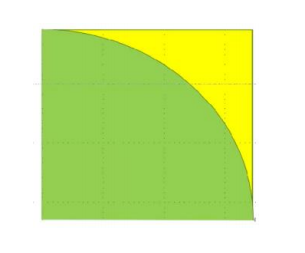

### this is the dataset for the green in 4.b

In [41]:
binary_dataset = []

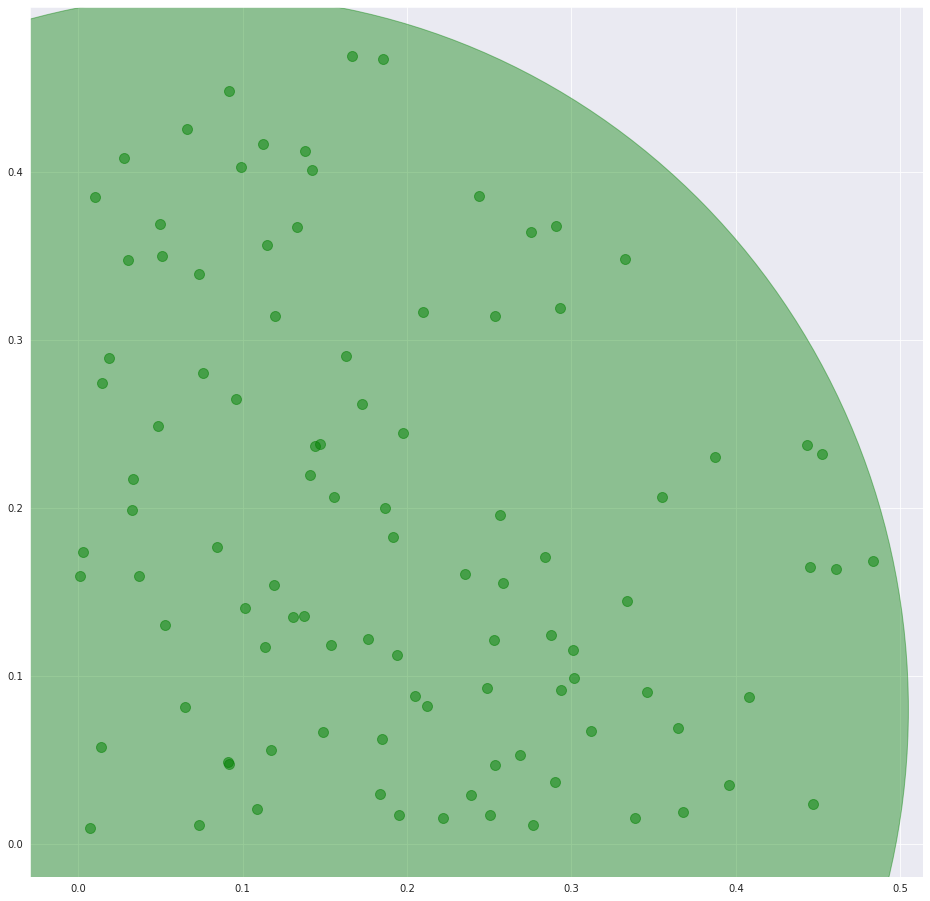

In [42]:
x1 = abs(np.random.normal(0, std, 500))
y1 = abs(np.random.normal(0, std, 500))

radiusSquared = math.pow(0.425, 2)
x2, y2 = [], []
for i, v in enumerate(x1):
    locationRelativeToCircle = math.pow((x1[i] - 0.08), 2) + math.pow((y1[i] - 0.08), 2)
    if (locationRelativeToCircle < radiusSquared) and len(x2) < 100:
        x2.append(x1[i])
        y2.append(y1[i])
binary_dataset.append(x2)
binary_dataset.append(y2)


fig = plt.figure(figsize=(16,16))
fig = plt.gcf()
ax = fig.gca()
circle1 = plt.Circle((0.08, 0.08), 0.425, color='g', alpha=0.4)
ax.add_artist(circle1)
plt.scatter(x2, y2, c='g', s=100, alpha=0.5)

### this is the dataset for the yellow in 4.b

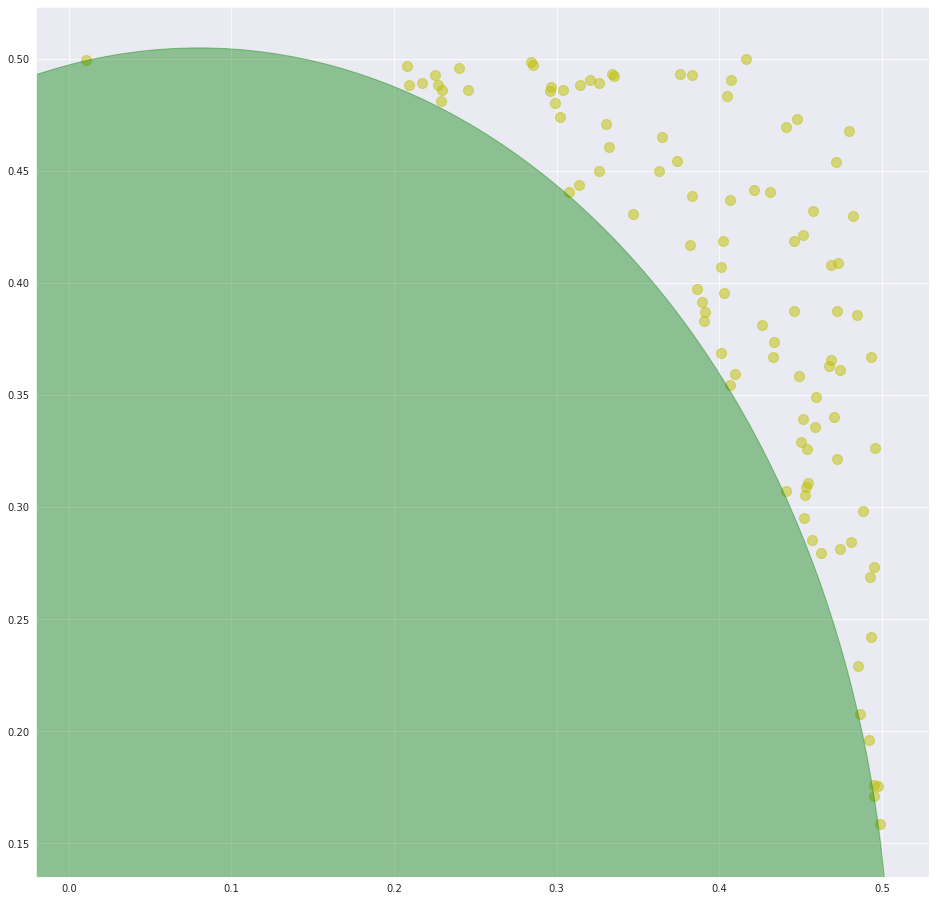

In [43]:
## top right
x1 = abs(np.random.normal(0, std, 15000))
y1 = abs(np.random.normal(0, std, 15000))

radiusSquared = math.pow(0.425, 2)
x2, y2 = [], []
for i, v in enumerate(x1):
    locationRelativeToCircle = math.pow((x1[i] - 0.08), 2) + math.pow((y1[i] - 0.08), 2)
    
    if (locationRelativeToCircle > radiusSquared) \
        and (x1[i] <= 0.5) and (y1[i] <= 0.5) and len(x2) < 100:
        x2.append(x1[i])
        y2.append(y1[i])
binary_dataset[0].extend(x2)
binary_dataset[1].extend(y2)


fig = plt.figure(figsize=(16,16))
fig = plt.gcf()
ax = fig.gca()
circle1 = plt.Circle((0.08, 0.08), 0.425, color='g', alpha=0.4)
ax.add_artist(circle1)
plt.scatter(x2, y2, c='y', s=100, alpha=0.5)

In [44]:
dataset = np.transpose(binary_dataset)

df = pd.DataFrame(dataset)
## shuffle a few times
df = df.sample(frac=1).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)
dataset = df.to_numpy()
df

0         1
0    0.461243  0.163811
1    0.197568  0.244637
2    0.064873  0.081493
3    0.462520  0.279466
4    0.091129  0.049016
..        ...       ...
195  0.245771  0.486343
196  0.485380  0.228983
197  0.362845  0.449908
198  0.396082  0.035227
199  0.367673  0.019307

[200 rows x 2 columns]

## generate and validate labels

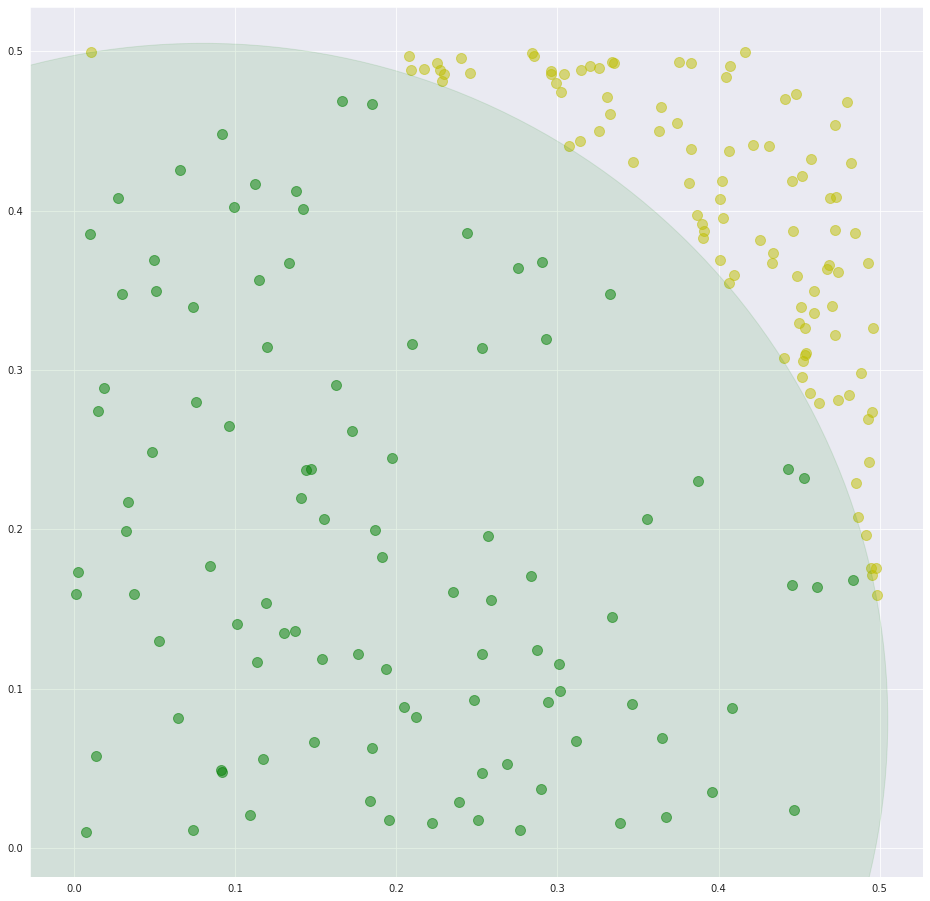

In [45]:
labels = []
ones = []
zeros = []
radiusSquared = math.pow(0.425, 2)

for i in range(len(dataset)):
    x0, y0 = dataset[i]
    locationRelativeToCircle = math.pow((x0 - 0.08), 2) + math.pow((y0 - 0.08), 2)

    if (locationRelativeToCircle > radiusSquared):
        labels.append(1)
        ones.append(i)
    else:
        labels.append(0)
        zeros.append(i)
        
fig = plt.figure(figsize=(16,16))
fig = plt.gcf()
ax = fig.gca()
circle1 = plt.Circle((0.08, 0.08), 0.425, color='g', alpha=0.1)
ax.add_artist(circle1)
for i,v in enumerate(labels):    
    if labels[i] == 1:
        plt.scatter(dataset[i][0], dataset[i][1], c='y', s=100, alpha=0.5)
    else:
        plt.scatter(dataset[i][0], dataset[i][1], c='g', s=100, alpha=0.5)

In [46]:
x_train = dataset[:160]
y_train = labels[:160]

x_val = dataset[-40:]
y_val = labels[-40:]
(x_train.shape, len(y_train)), (x_val.shape, len(y_val))

(((160, 2), 160), ((40, 2), 40))

## For this problem I chose to use:
- 1 hidden layer
- relu as the activation for the input and hidden layers (because binary data: 0 or 1 as ouput) 
- sigmoid for activation in last layer (because sum of outputs does not to equal 1)
- rmsprop (because its good for SGD) 
- binary_crossentropy for loss (because data is binary)

## My model

In [47]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [48]:
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

In [49]:
history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=16,
                    validation_data=(x_val, y_val))

Train on 160 samples, validate on 40 samples
Epoch 1/100
160/160 [==============================] - 0s 3ms/step - loss: 0.6700 - acc: 0.5000 - val_loss: 0.6662 - val_acc: 0.5250
Epoch 2/100
160/160 [==============================] - 0s 155us/step - loss: 0.6605 - acc: 0.5000 - val_loss: 0.6610 - val_acc: 0.5500
Epoch 3/100
160/160 [==============================] - 0s 182us/step - loss: 0.6530 - acc: 0.5625 - val_loss: 0.6547 - val_acc: 0.5750
Epoch 4/100
160/160 [==============================] - 0s 196us/step - loss: 0.6457 - acc: 0.5500 - val_loss: 0.6492 - val_acc: 0.5750
Epoch 5/100
160/160 [==============================] - 0s 199us/step - loss: 0.6379 - acc: 0.6375 - val_loss: 0.6420 - val_acc: 0.5750
Epoch 6/100
160/160 [==============================] - 0s 190us/step - loss: 0.6301 - acc: 0.6437 - val_loss: 0.6348 - val_acc: 0.5750
Epoch 7/100
160/160 [==============================] - 0s 299us/step - loss: 0.6219 - acc: 0.6813 - val_loss: 0.6272 - val_acc: 0.5750
Epoch 8/100


160/160 [==============================] - 0s 199us/step - loss: 0.1817 - acc: 0.9313 - val_loss: 0.1682 - val_acc: 0.9750
Epoch 62/100
160/160 [==============================] - 0s 119us/step - loss: 0.1805 - acc: 0.9313 - val_loss: 0.1651 - val_acc: 0.9750
Epoch 63/100
160/160 [==============================] - 0s 152us/step - loss: 0.1753 - acc: 0.9313 - val_loss: 0.1615 - val_acc: 0.9750
Epoch 64/100
160/160 [==============================] - 0s 142us/step - loss: 0.1744 - acc: 0.9375 - val_loss: 0.1571 - val_acc: 0.9750
Epoch 65/100
160/160 [==============================] - 0s 114us/step - loss: 0.1711 - acc: 0.9375 - val_loss: 0.1534 - val_acc: 0.9750
Epoch 66/100
160/160 [==============================] - 0s 116us/step - loss: 0.1679 - acc: 0.9250 - val_loss: 0.1519 - val_acc: 0.9750
Epoch 67/100
160/160 [==============================] - 0s 112us/step - loss: 0.1670 - acc: 0.9375 - val_loss: 0.1489 - val_acc: 0.9750
Epoch 68/100
160/160 [==============================] - 0s 11

## Evaluating the model

In [50]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

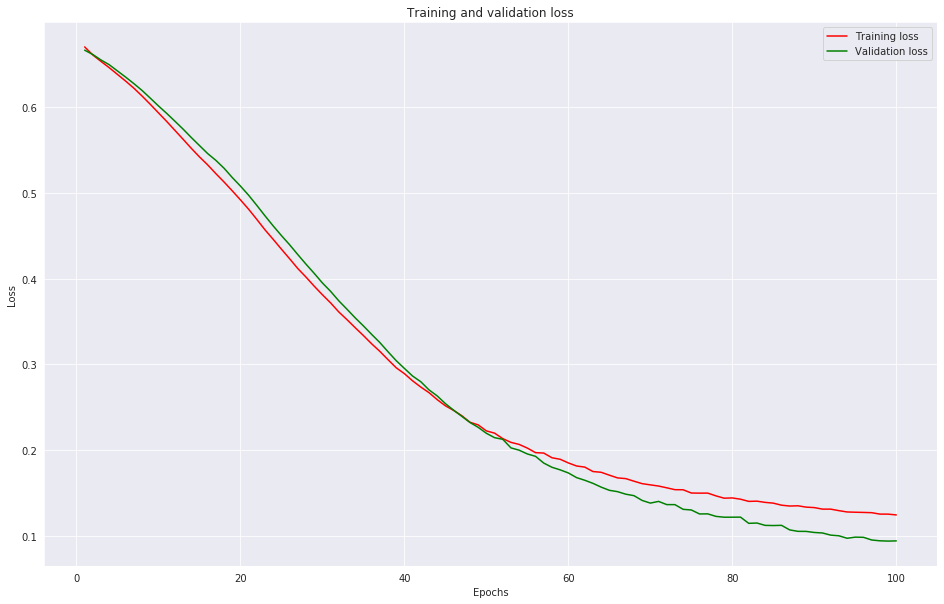

In [51]:
acc = history_dict['acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(16, 10))
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

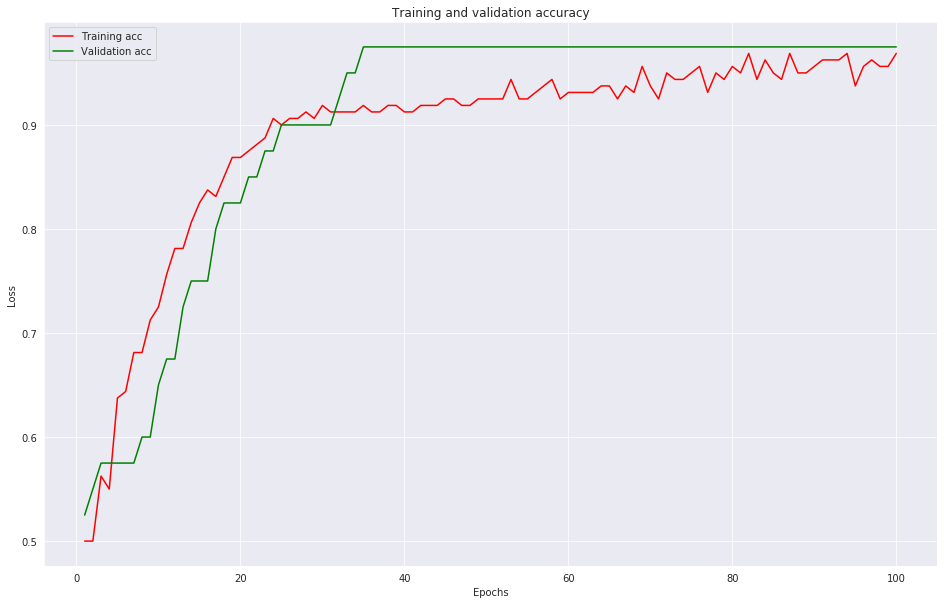

In [52]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(16, 10))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Testing

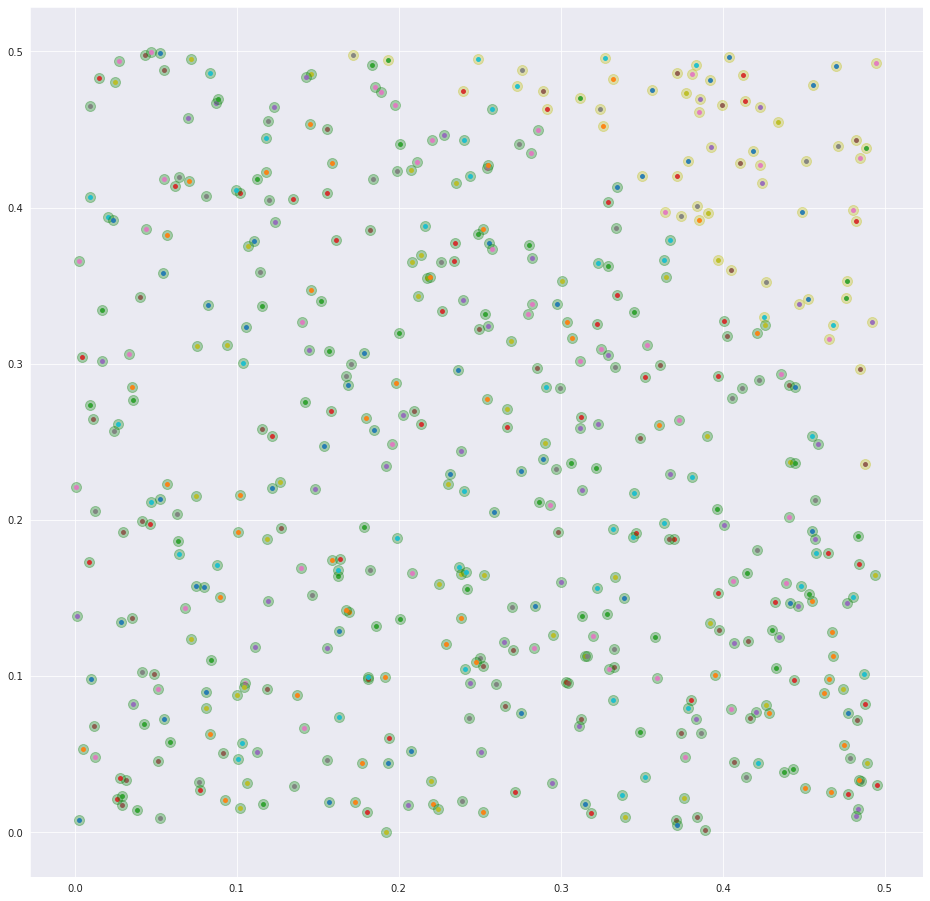

In [53]:
x_test, y_test = [], []
x1_test = abs(np.random.rand(5000))
y1_test = abs(np.random.rand(5000))

x2_test, y2_test = [], []
for i, v in enumerate(x1_test):
    if x1_test[i] <= 0.5 and y1_test[i] <= 0.5 and len(x2_test) < 500:
        x2_test.append(x1_test[i])
        y2_test.append(y1_test[i])
x_test.append(x2_test)
x_test.append(y2_test)
x_test = np.transpose(x_test)

## dont need to shuffle because it is a random set of points

for i in range(len(x_test)):
    x0, y0 = x_test[i]
    locationRelativeToCircle = math.pow((x0 - 0.08), 2) + math.pow((y0 - 0.08), 2)
    if (locationRelativeToCircle > radiusSquared):
        y_test.append(1)
    else:
        y_test.append(0)
        
plt.figure(figsize=(16,16))
for i,v in enumerate(y_test):
    if y_test[i] == 1:
        plt.scatter(x_test[i][0], x_test[i][1], c='y', s=100, alpha=0.3)
        plt.scatter(x_test[i][0], x_test[i][1], s=15, alpha=0.9)
    else:
        plt.scatter(x_test[i][0], x_test[i][1], c='g', s=100, alpha=0.3)
        plt.scatter(x_test[i][0], x_test[i][1], s=15, alpha=0.9) 

In [54]:
results = model.evaluate(x_test, y_test)
results, model.metrics_names

500/500 [==============================] - 0s 24us/step


([0.22512034487724303, 0.8879999995231629], ['loss', 'acc'])

# ðŸ˜° ðŸ˜± ðŸ¥µ ðŸ¥¶ ðŸ¤§ ðŸ¥´